In [1]:
###  Raster Hydrograph using pandas, numpy, and matplotlib.

# Developed by Daniel Aragon <aragonecologic@gmail.com, daniel.aragon@mbakerintl.com>. Process adapted from workshop by 
# Richard Koehler, PhD, PH with NOAA-NWS <richard.koehler@noaa.gov>

import pandas as pd
import numpy as np
import csv
import datetime
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [24]:
# csv has been cleaned of usgs information, only the gage records are included here
csv = r"RoaringFork_DailyQ_USGSgage_09073300.csv"

# Read csv into pandas Dataframe
df = pd.read_csv(csv,header = None)
df.head()

,0,1,2,3,4
0,USGS,9073300,10/1/1979,25.0,A
1,USGS,9073300,10/2/1979,25.0,A
2,USGS,9073300,10/3/1979,24.0,A
3,USGS,9073300,10/4/1979,22.0,A
4,USGS,9073300,10/5/1979,22.0,A


In [25]:
# convert dates to pandas datetime object
df[2] = pd.to_datetime(df[2])
# print (df[2].dtype)

# drop unnecessary columns
df = df.drop([0,1,4],1)

# create new column for day of year
df['day'] = 0
df['year'] = 0
df.rename(columns={3:'cfs'}, inplace=True)

# convert datetimes to day of year
length = len(df)
# print (length)
for i in range(length):
    df.loc[i,'day'] = df.loc[i,2].dayofyear
    df.loc[i,'year'] = df.loc[i,2].year


# drop original datatime objects now that day of year is defined
df = df.drop([2],1)
df.head()

,cfs,day,year
0,25.0,274,1979
1,25.0,275,1979
2,24.0,276,1979
3,22.0,277,1979
4,22.0,278,1979


In [34]:
### 2-d histogram from <https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram2d.html>

# Define mins and maxs for the data
yr_min = df['year'].min()
yr_max = df['year'].max()
day_min = df['day'].min()
day_max = df['day'].max()
cfs_min = df['cfs'].min()
cfs_max = df['cfs'].max()
# print (yr_max-yr_min,day_max-day_min,)

# Produce arrays that will define axes in colormesh plot
x = np.arange(day_min,day_max+1)
y = np.arange(yr_min, yr_max+1)

# Define X and Y by meshgrid
X,Y = np.meshgrid(x,y)
print ("X shape:", X.shape)

# Define histogram values (raster colors)
z = df['cfs'].values

# Create new Z dataframe with same shape as X,Y - important!!!
Z= pd.DataFrame(0,index=y,columns=x)
print ("Z shape: ", Z.shape)

# The Z values must be in a dataframe of the same shape as x and y
# Fill in new dataframe by stepping line through line in the gage data
# and writing it into the Z dataframe
for i in range(length):
    day = df['day'].iloc[i]
    year = df['year'].iloc[i]
    cfs = df['cfs'].iloc[i]
    Z.loc[year,day] = cfs
#     print (day, year, cfs)
#     Z.loc[year, day] = cfs
#     day = df.ix[i,'day'] 
#     year = df.ix[i,'year']
#     cfs = df.ix[i, 'cfs']
#     # print (day, year, cfs)
#     Z.ix[year,day] = cfs

    
Z

X shape: (39, 366)
Z shape:  (39, 366)


,1,2,3,4,5,6,7,8,9,10,...,357,358,359,360,361,362,363,364,365,366
1979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.0,11.0,13.0,12.0,12.0,12.0,10.0,10.0,11.0,0.0
1980,12.0,12.0,11.0,12.0,11.0,11.0,11.0,11.0,11.0,10.0,...,15.0,15.0,15.0,15.0,15.0,15.0,16.0,16.0,16.0,16.0
1981,15.0,15.0,16.0,15.0,15.0,15.0,14.0,14.0,14.0,14.0,...,14.0,14.0,14.0,14.0,14.0,14.0,15.0,15.0,15.0,0.0
1982,15.0,14.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,14.0,...,13.0,13.0,13.0,13.0,13.0,12.0,12.0,12.0,12.0,0.0
1983,12.0,12.0,13.0,12.0,12.0,13.0,13.0,13.0,13.0,13.0,...,17.0,17.0,18.0,19.0,18.0,17.0,17.0,18.0,19.0,0.0
1984,19.0,18.0,16.0,17.0,18.0,18.0,18.0,18.0,18.0,19.0,...,29.0,28.0,28.0,29.0,30.0,30.0,30.0,30.0,28.0,28.0
1985,28.0,28.0,26.0,26.0,27.0,27.0,27.0,27.0,26.0,26.0,...,17.0,17.0,18.0,19.0,17.0,17.0,17.0,16.0,16.0,0.0
1986,17.0,17.0,15.0,16.0,17.0,16.0,15.0,16.0,16.0,16.0,...,25.0,25.0,25.0,26.0,26.0,26.0,25.0,25.0,25.0,0.0
1987,25.0,24.0,24.0,24.0,23.0,23.0,23.0,22.0,22.0,21.0,...,18.0,18.0,18.0,17.0,16.0,18.0,20.0,19.0,19.0,0.0
1988,19.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,16.0,16.0,...,17.0,16.0,17.0,17.0,17.0,16.0,13.0,15.0,16.0,17.0


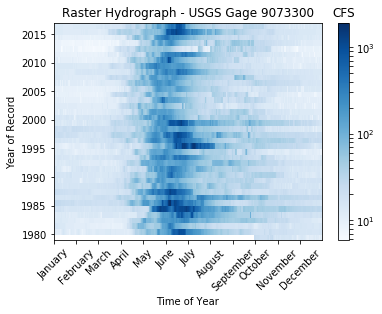

In [54]:
# Plotting, note colors are logNorm for greater effect
plt.figure()
plt.pcolormesh(X,Y,Z, norm=LogNorm(vmin=cfs_min, vmax=cfs_max),cmap='Blues')

# Colorbar
clb = plt.colorbar()
clb.ax.set_title('CFS')

if False:
    # Contour of Bankfull (385cfs)
    CS = plt.contour(X,Y,Z,levels=[385],colors='k',linewidths=(1,))
    plt.clabel(CS,fmt = '%2.1d',colors='k',fontsize=8)

# Add titles, labes, and xticks
plt.title('Raster Hydrograph - USGS Gage 9073300')
plt.xlabel('Time of Year')
plt.ylabel('Year of Record')

ticks = np.arange(day_min,day_max,30.5)
labels = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.xticks(ticks,labels)
plt.xticks(rotation=45)

# Show plot
plt.show()
plt.savefig(r"/Users/Daniel/Documents/Programming/Project_Scripts/USGS_Heatmap/figure.pdf")
plt.close()
